In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfs = [pd.read_csv('../build/relaxed_fixed_0_0_1.log', header=None, sep=' '),
       pd.read_csv('../build/relaxed_fixed_0_1.log', header=None, sep=' '),
       pd.read_csv('../build/relaxed_fixed_0_0_1_w_spring_0_0_1.log', header=None, sep=' ')]

/home/olaralex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


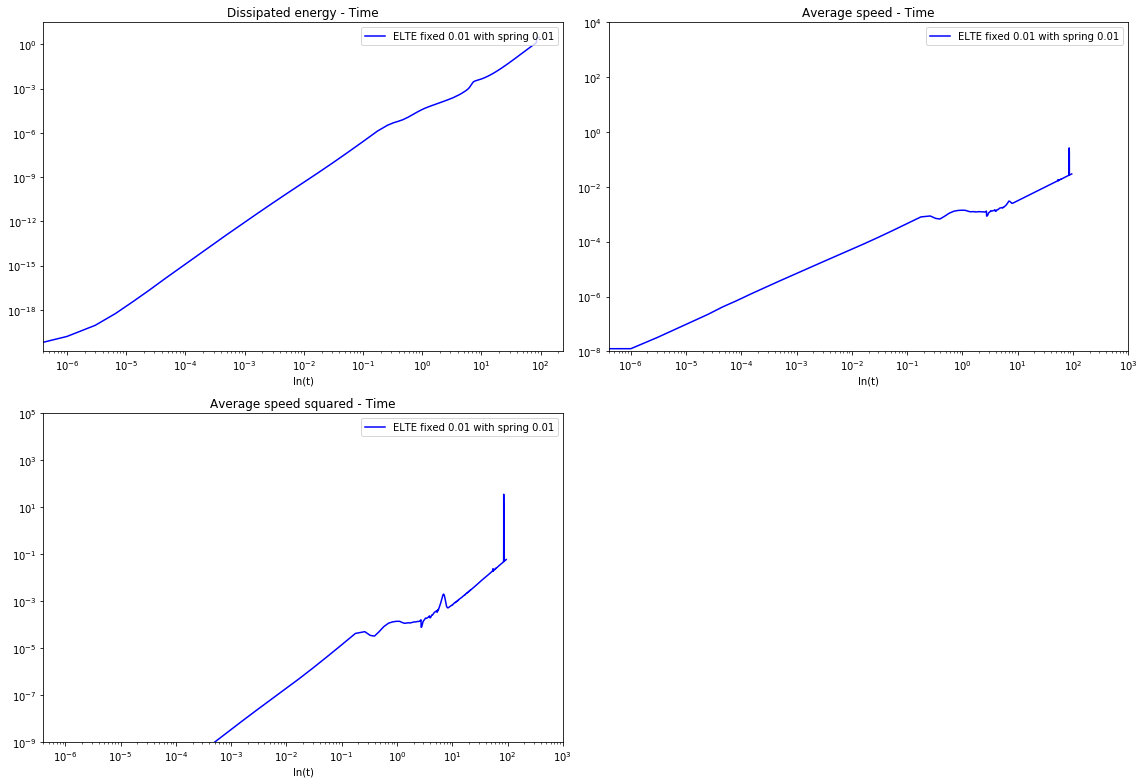

In [3]:
for df in dfs:
    df.columns = ['simulation time', 'number of successful steps',
        'number of failed steps', 'worst error ratio squared',
        'average speed of the dislocations', 'cutoff (used in the semi implicit scheme)',
        'order parameter', 'value of the external stress',
        'computation time between the last two successful steps', 'accumulated strain',
        'average v2', 'energy of the system']

    
times = [df['simulation time'] for df in dfs]
energys = [df['energy of the system'] for df in dfs]
speeds = [df['average speed of the dislocations'] for df in dfs]
speed2s = [df['average v2'] for df in dfs]

colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k', '#eeefff',  '#040fff',  '#ee223f',  '#001212', '#123133']

plt.figure(figsize=(16, 11))
for i in range(2, len(dfs)):
    plt.subplot("221")
    plt.title("Dissipated energy - Time")
    plt.loglog(times[i], energys[i], c=colors[i], label='ELTE fixed 0.01 with spring 0.01')
    plt.legend(loc='upper right')
    #plt.xticks(np.arange(0, 100, 20))
    plt.xlabel("ln(t)")
    plt.subplot("222")
    plt.title("Average speed - Time")
    plt.loglog(times[i], speeds[i], c=colors[i], label='ELTE fixed 0.01 with spring 0.01')
    plt.xlim(0, 1000)
    plt.ylim(0.00000001, 10000)
    plt.legend(loc='upper right')
    plt.xlabel("ln(t)")
    plt.subplot("223")
    plt.title("Average speed squared - Time")
    plt.loglog(times[i], speed2s[i], c=colors[i], label='ELTE fixed 0.01 with spring 0.01')
    plt.xlim(0, 1000)
    plt.ylim(0.000000001, 100000)
    plt.xlabel("ln(t)")

plt.tight_layout()
plt.legend(loc='upper right')

plt.savefig('all_elte_fixed_0_0_1_w_spring.png')
plt.show()

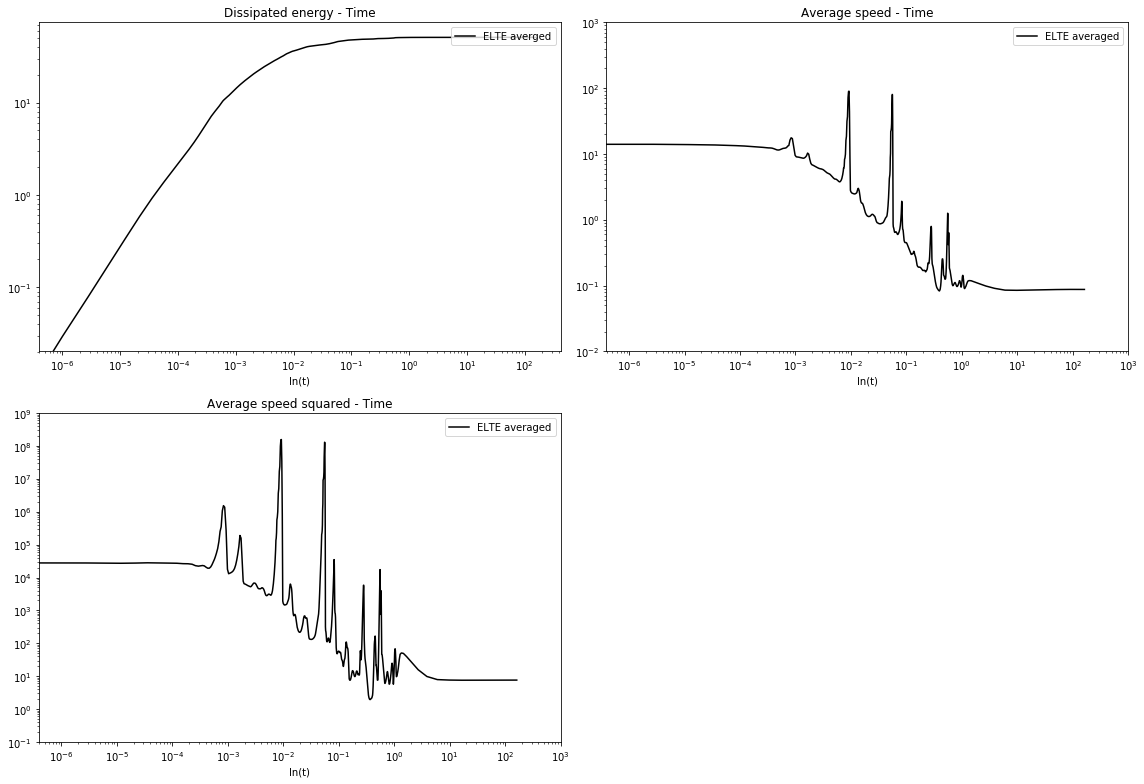

In [7]:
dfs = [pd.read_csv('../build/outputs/dat%d.log' % i, sep=' ', header=None) for i in range(1, 11)]

for df in dfs:
    df.columns = ['simulation time', 'number of successful steps',
        'number of failed steps', 'worst error ratio squared',
        'average speed of the dislocations', 'cutoff (used in the semi implicit scheme)',
        'order parameter', 'value of the external stress',
        'computation time between the last two successful steps', 'accumulated strain',
        'average v2', 'energy of the system']

    
times = np.array([df['simulation time'].values[:641] for df in dfs])
energys = np.array([df['energy of the system'].values[:641] for df in dfs])
speeds = np.array([df['average speed of the dislocations'].values[:641] for df in dfs])
speed2s = np.array([df['average v2'].values[:641] for df in dfs])

times = [np.mean(times, axis=0)]
energys = [np.mean(energys, axis=0)]
speeds = [np.mean(speeds, axis=0)]
speed2s = [np.mean(speed2s, axis=0)]

colors = [ 'k', '#eeefff',  '#040fff',  '#ee223f',  '#001212', '#123133']

plt.figure(figsize=(16, 11))
for i in range(0, 1):
    plt.subplot("221")
    plt.title("Dissipated energy - Time")
    plt.loglog(times[i], energys[i], c=colors[i], label='ELTE averged')
    #plt.xlim(-1, 60)
    plt.legend(loc='upper right')
    #plt.xticks(np.arange(0, 100, 20))
    plt.xlabel("ln(t)")
    plt.subplot("222")
    plt.title("Average speed - Time")
    plt.loglog(times[i], speeds[i], c=colors[i], label='ELTE averaged')
    plt.xlim(0, 1000)
    plt.ylim(0.01, 1000)
    plt.legend(loc='upper right')
    plt.xlabel("ln(t)")
    plt.subplot("223")
    plt.title("Average speed squared - Time")
    plt.loglog(times[i], speed2s[i], c=colors[i],  label='ELTE averaged')
    plt.xlim(0, 1000)
    plt.ylim(0.1, 1000000000)
    plt.xlabel("ln(t)")

plt.tight_layout()
plt.legend(loc='upper right')

plt.savefig('all_elte_averaged.png')
plt.show()